In [ ]:
import numpy as np 
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

import missingno as msno #visualises missing values
from wordcloud import WordCloud #to find the most frequent words 
from collections import Counter 


In [ ]:
#data that is being scraped from source 
scrape = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

### Pre-Processing(data cleaning):
- loading
- peeking
- general info

In [ ]:
#loading data 
df = pd.read_csv(scrape)

In [218]:
df.head()

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18


In [ ]:
df.tail() #addressed results a few lines down

In [220]:
#number of countries with monkeypox cases
len(df["Country"].unique())

115

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43887 entries, 0 to 43886
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       43887 non-null  object 
 1   Status                   43887 non-null  object 
 2   Location                 31545 non-null  object 
 3   City                     1222 non-null   object 
 4   Country                  43887 non-null  object 
 5   Country_ISO3             43887 non-null  object 
 6   Age                      2648 non-null   object 
 7   Gender                   2178 non-null   object 
 8   Date_onset               56 non-null     object 
 9   Date_confirmation        41082 non-null  object 
 10  Symptoms                 199 non-null    object 
 11  Hospitalised (Y/N/NA)    299 non-null    object 
 12  Date_hospitalisation     32 non-null     object 
 13  Isolated (Y/N/NA)        415 non-null    object 
 14  Date_isolation        

In [ ]:
#to see the number of missing values for the columns in the dataset

df.isnull().sum() 

In [ ]:
#further breakdown of missing values and their proportionality

total = df.isnull().sum().sort_values(ascending=False) #my isnull function loops through each row in a single column and return 1 for missing data & 0 for non-missing 
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #finds the percentage of these missing values that each colum adds up to
missing_values = pd.concat([total, percentage], axis=1, keys=["Total", "Percentage"])
missing_values.head(50)

In [ ]:
#BASED ON THE OUTPUT OF THE CODE ABOVE I NEED TO OMIT THE USELESS COLUMNS WITH MISSING VALUES SUCH AS THE "SOURCE COLUMNS", BUT I CANNOT DECIDE WHAT ROUTE I WANT TO TAKE AT THIS TIME SO ILL COME BACK

##### A few values will have to be omitted due to their lack of importance in regards to the integrity of my dataset. I will conduct deeper cleaning

### Exploratory Data Analysis (EDA)

In [229]:
#to show the top 15 countries by monkeypox cases in desc order
top = df["Country"].value_counts().nlargest(n=15)
top 

United States                       14293
Spain                                5978
Brazil                               3491
Germany                              3242
England                              3050
France                               2761
Democratic Republic Of The Congo     2266
Canada                               1206
Netherlands                          1087
Peru                                  894
Portugal                              770
Italy                                 671
Belgium                               624
Nigeria                               413
Switzerland                           399
Name: Country, dtype: int64

In [222]:
#function that plots the number of monkeypox cases per country (matplotlib & seaborn) (non interactive)
def countrycases():
    plt.figure(figsize=(50,8))
    sns.countplot(x="Country", data=df)
    plt.xticks(rotation=90)
    plt.show()

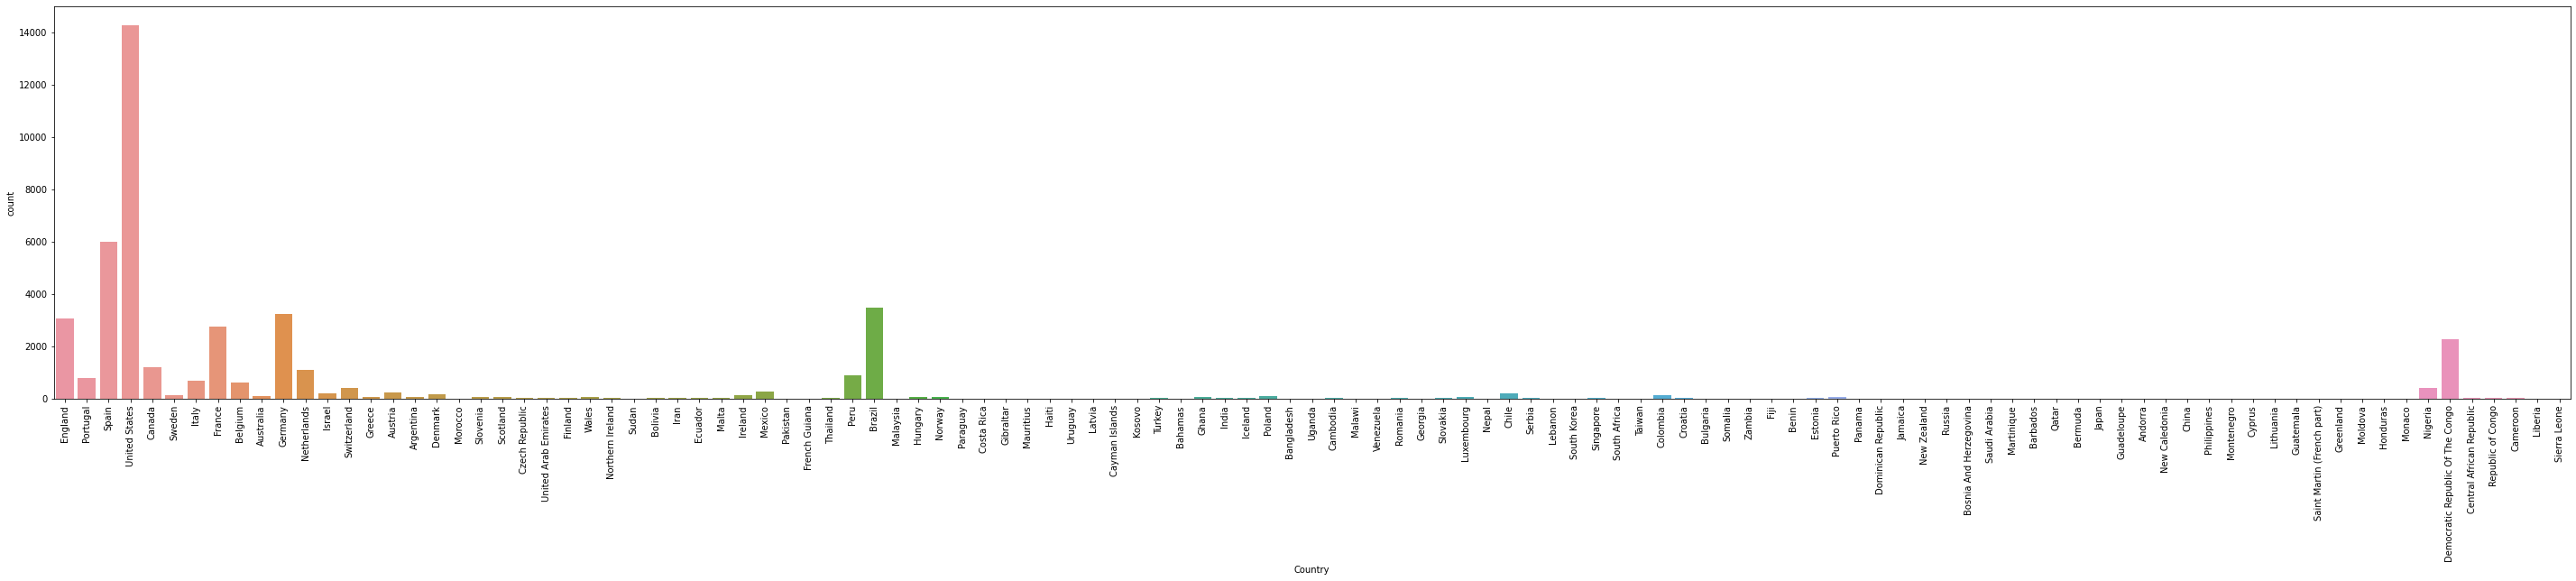

In [223]:
countrycases()

In [ ]:
#lists the top 15 cities with monkeypox cases ranked in desc order
citycases = df["City"].value_counts().nlargest(n=15)
print(citycases)

<AxesSubplot:xlabel='Status', ylabel='count'>

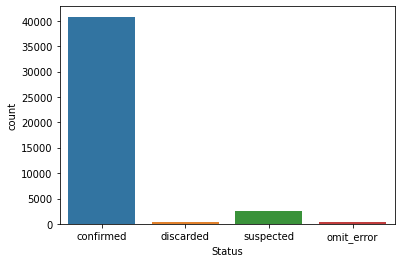

In [217]:
#distribution based on status (total)
sns.countplot(x="Status",data=df)

In [216]:
#the 5 most common symptoms

simp = ' '.join(df["Symptoms"].fillna("0").to_list())
freq = Counter(simp.split())
freq.most_common(5)


[('0', 43688), ('lesions', 76), ('genital', 53), ('skin', 43), ('fever,', 36)]

### Features

In [239]:

#This is going to contain your heatmap